In [1]:
import pandas as pd

# Load the bias training data
bias_train = pd.read_csv('../News-Bias-Detection/BEAD/1-Text-Classification/bias-train.csv')

# Preview the data
print(bias_train.head())


   Unnamed: 0                                               text  label
0       13901  For those making fun of beating lowly Oak, ple...      0
1       17975  Belichik cannot wait to claim Sloter from the ...      1
2       28402  I am officially over him. He was a waste of ti...      0
3         717  dont ever use Clean And Clear Shine Control  i...      1
4        1520  If an explanation is not provided, how would o...      1


In [2]:
import re

def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning to the 'text' column
bias_train['cleaned_text'] = bias_train['text'].apply(clean_text)

print(bias_train.head())


   Unnamed: 0                                               text  label  \
0       13901  For those making fun of beating lowly Oak, ple...      0   
1       17975  Belichik cannot wait to claim Sloter from the ...      1   
2       28402  I am officially over him. He was a waste of ti...      0   
3         717  dont ever use Clean And Clear Shine Control  i...      1   
4        1520  If an explanation is not provided, how would o...      1   

                                        cleaned_text  
0  for those making fun of beating lowly oak plea...  
1  belichik cannot wait to claim sloter from the ...  
2  i am officially over him he was a waste of tim...  
3  dont ever use clean and clear shine control it...  
4  if an explanation is not provided how would on...  


In [3]:
# !pip install nltk
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
# import nltk
nltk.download('punkt_tab')

print(nltk.data.find('tokenizers/punkt'))

bias_train['tokens'] = bias_train['cleaned_text'].apply(word_tokenize)

print(bias_train.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


C:\Users\shiva\AppData\Roaming\nltk_data\tokenizers\punkt
   Unnamed: 0                                               text  label  \
0       13901  For those making fun of beating lowly Oak, ple...      0   
1       17975  Belichik cannot wait to claim Sloter from the ...      1   
2       28402  I am officially over him. He was a waste of ti...      0   
3         717  dont ever use Clean And Clear Shine Control  i...      1   
4        1520  If an explanation is not provided, how would o...      1   

                                        cleaned_text  \
0  for those making fun of beating lowly oak plea...   
1  belichik cannot wait to claim sloter from the ...   
2  i am officially over him he was a waste of tim...   
3  dont ever use clean and clear shine control it...   
4  if an explanation is not provided how would on...   

                                              tokens  
0  [for, those, making, fun, of, beating, lowly, ...  
1  [belichik, can, not, wait, to, claim, slo

In [4]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

bias_train['tokens_without_stopwords'] = bias_train['tokens'].apply(remove_stopwords)
print(bias_train.head())



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   Unnamed: 0                                               text  label  \
0       13901  For those making fun of beating lowly Oak, ple...      0   
1       17975  Belichik cannot wait to claim Sloter from the ...      1   
2       28402  I am officially over him. He was a waste of ti...      0   
3         717  dont ever use Clean And Clear Shine Control  i...      1   
4        1520  If an explanation is not provided, how would o...      1   

                                        cleaned_text  \
0  for those making fun of beating lowly oak plea...   
1  belichik cannot wait to claim sloter from the ...   
2  i am officially over him he was a waste of tim...   
3  dont ever use clean and clear shine control it...   
4  if an explanation is not provided how would on...   

                                              tokens  \
0  [for, those, making, fun, of, beating, lowly, ...   
1  [belichik, can, not, wait, to, claim, sloter, ...   
2  [i, am, officially, over, him, he, was, a

In [5]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

bias_train['lemmatized_tokens'] = bias_train['tokens_without_stopwords'].apply(lemmatize_tokens)
print(bias_train.head())



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   Unnamed: 0                                               text  label  \
0       13901  For those making fun of beating lowly Oak, ple...      0   
1       17975  Belichik cannot wait to claim Sloter from the ...      1   
2       28402  I am officially over him. He was a waste of ti...      0   
3         717  dont ever use Clean And Clear Shine Control  i...      1   
4        1520  If an explanation is not provided, how would o...      1   

                                        cleaned_text  \
0  for those making fun of beating lowly oak plea...   
1  belichik cannot wait to claim sloter from the ...   
2  i am officially over him he was a waste of tim...   
3  dont ever use clean and clear shine control it...   
4  if an explanation is not provided how would on...   

                                              tokens  \
0  [for, those, making, fun, of, beating, lowly, ...   
1  [belichik, can, not, wait, to, claim, sloter, ...   
2  [i, am, officially, over, him, he, was, a

In [6]:
bias_train['processed_text'] = bias_train['lemmatized_tokens'].apply(' '.join)


In [7]:
# Check for missing values
print(bias_train.isnull().sum())

# Drop rows with missing values if necessary
bias_train = bias_train.dropna()


Unnamed: 0                  0
text                        0
label                       0
cleaned_text                0
tokens                      0
tokens_without_stopwords    0
lemmatized_tokens           0
processed_text              0
dtype: int64


In [8]:
bias_train.to_csv('preprocessed_bias_train.csv', index=False)


In [9]:
!pip install pyLDAvis

In [10]:
pip install pandas gensim matplotlib wordcloud


Note: you may need to restart the kernel to use updated packages.


In [11]:

import numpy
import scipy

from gensim import corpora

from gensim.models import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim_models

# Create a dictionary from the preprocessed data
dictionary = corpora.Dictionary(bias_train['lemmatized_tokens'])

# Create the corpus
corpus = [dictionary.doc2bow(text) for text in bias_train['lemmatized_tokens']]

# Set up the LDA model
num_topics = 5  # You can adjust this number
lda_model = LdaMulticore(corpus=corpus, 
                         id2word=dictionary, 
                         num_topics=num_topics, 
                         random_state=42,
                         passes=10,
                         workers=2)

# Print the topics
print("LDA Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=bias_train['lemmatized_tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'\nCoherence Score: {coherence_lda}')

# Visualize the topics
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


LDA Topics:
Topic: 0 
Words: 0.015*"article" + 0.014*"n" + 0.013*"nn" + 0.011*"page" + 0.006*"please" + 0.006*"wikipedia" + 0.006*"talk" + 0.005*"would" + 0.004*"see" + 0.004*"link"

Topic: 1 
Words: 0.019*"im" + 0.010*"day" + 0.009*"good" + 0.008*"get" + 0.008*"like" + 0.007*"go" + 0.007*"love" + 0.007*"got" + 0.006*"cant" + 0.006*"going"

Topic: 2 
Words: 0.012*"youfuck" + 0.007*"u" + 0.004*"n" + 0.004*"mother" + 0.004*"climate" + 0.003*"shit" + 0.003*"piece" + 0.003*"fucking" + 0.003*"warming" + 0.002*"weinstein"

Topic: 3 
Words: 0.007*"people" + 0.007*"would" + 0.007*"trump" + 0.006*"one" + 0.005*"like" + 0.005*"right" + 0.005*"dont" + 0.004*"think" + 0.004*"u" + 0.004*"many"

Topic: 4 
Words: 0.008*"tax" + 0.007*"get" + 0.007*"year" + 0.006*"people" + 0.006*"would" + 0.005*"money" + 0.005*"need" + 0.004*"dont" + 0.004*"one" + 0.004*"u"


Coherence Score: 0.5772704927988801


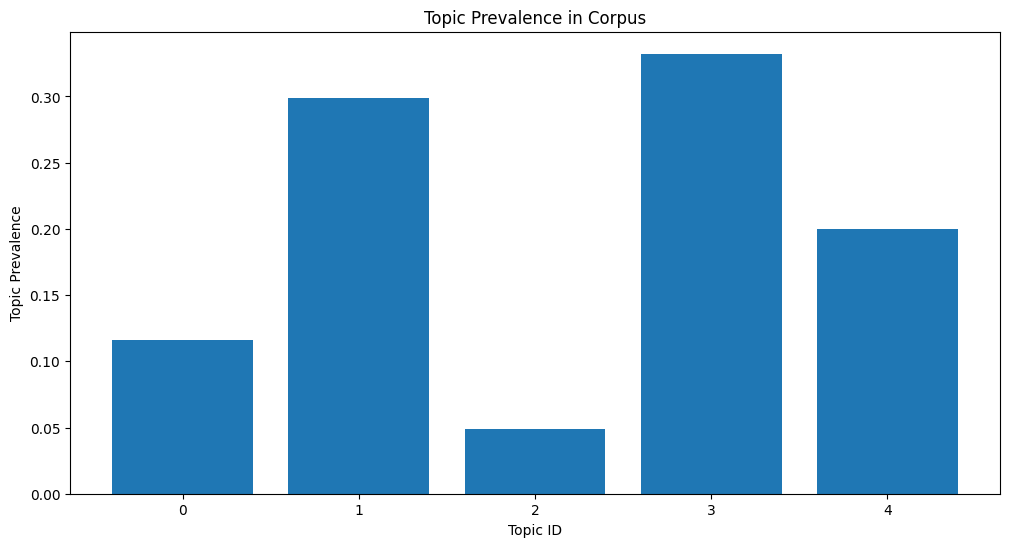


Analyzing Topic 3
Top terms: {'people': 0.0071264734, 'would': 0.006823722, 'trump': 0.006533537, 'one': 0.0063821655, 'like': 0.0048338138, 'right': 0.004648236, 'dont': 0.0045329733, 'think': 0.0037314848, 'u': 0.003725715, 'many': 0.00363252}


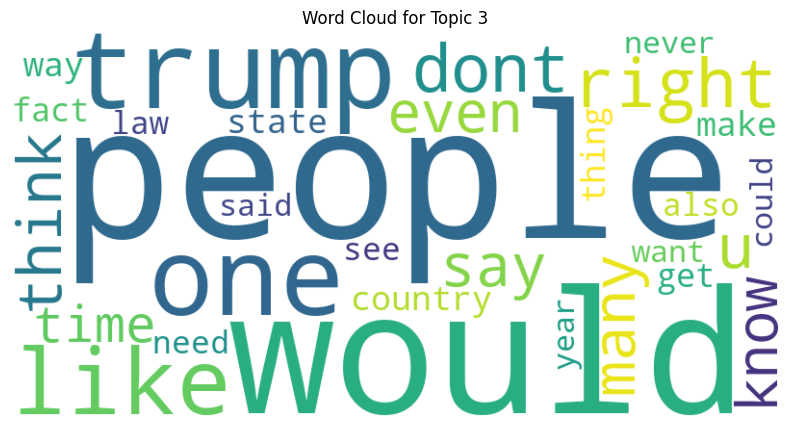


Analyzing Topic 1
Top terms: {'im': 0.019228334, 'day': 0.010342969, 'good': 0.0088378405, 'get': 0.008432433, 'like': 0.008024547, 'go': 0.00735827, 'love': 0.0069082174, 'got': 0.0068892054, 'cant': 0.0063021732, 'going': 0.0062534916}


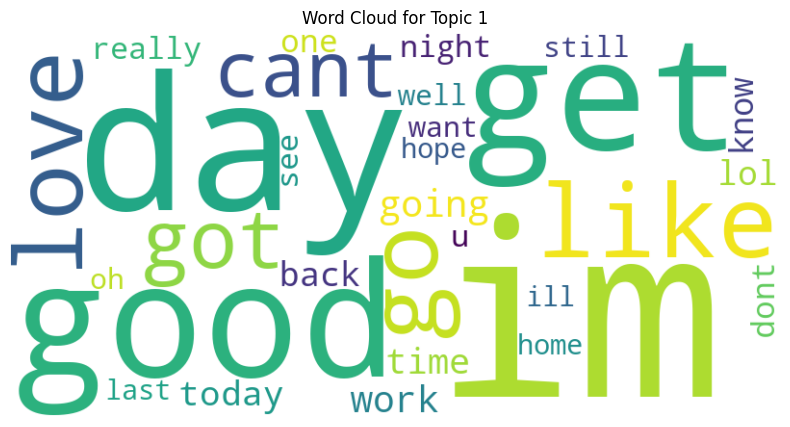


Analyzing Topic 4
Top terms: {'tax': 0.007610018, 'get': 0.0074678147, 'year': 0.007083135, 'people': 0.0057062097, 'would': 0.0056501864, 'money': 0.0054712566, 'need': 0.00472126, 'dont': 0.004471902, 'one': 0.0044420194, 'u': 0.0044055264}


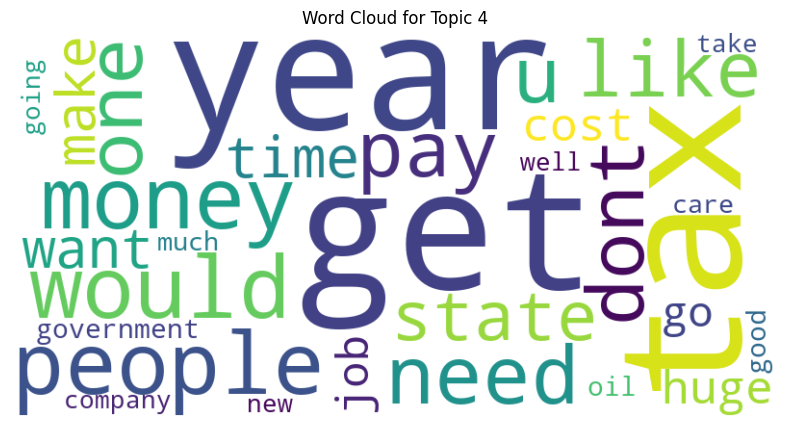


Analyzing Topic 0
Top terms: {'article': 0.014503605, 'n': 0.01406058, 'nn': 0.013260561, 'page': 0.010716821, 'please': 0.0062607797, 'wikipedia': 0.0061261915, 'talk': 0.0056651793, 'would': 0.004500946, 'see': 0.0042109014, 'link': 0.0039851293}


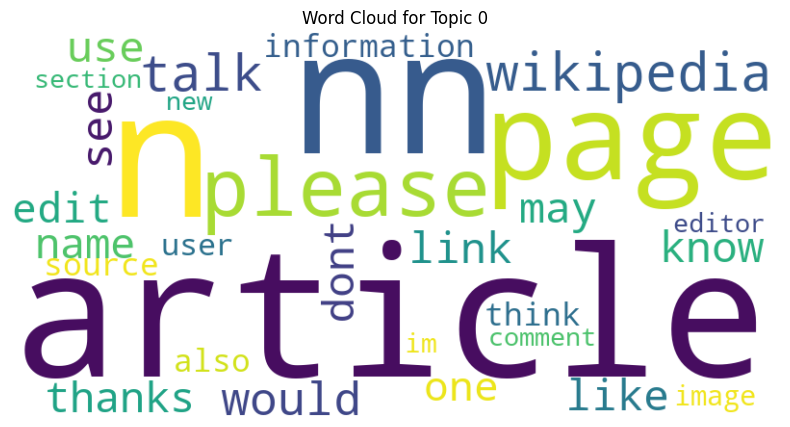


Analyzing Topic 2
Top terms: {'youfuck': 0.012166318, 'u': 0.007333865, 'n': 0.0041428055, 'mother': 0.003877831, 'climate': 0.0035690982, 'shit': 0.0034573355, 'piece': 0.0031865386, 'fucking': 0.0027245726, 'warming': 0.0026011588, 'weinstein': 0.001967163}


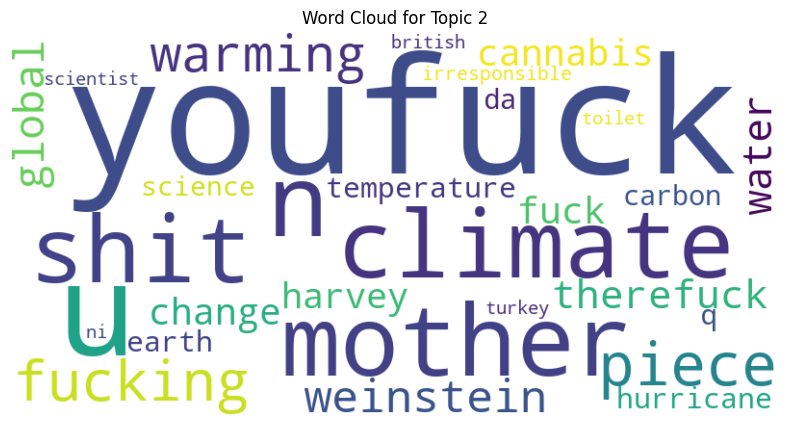

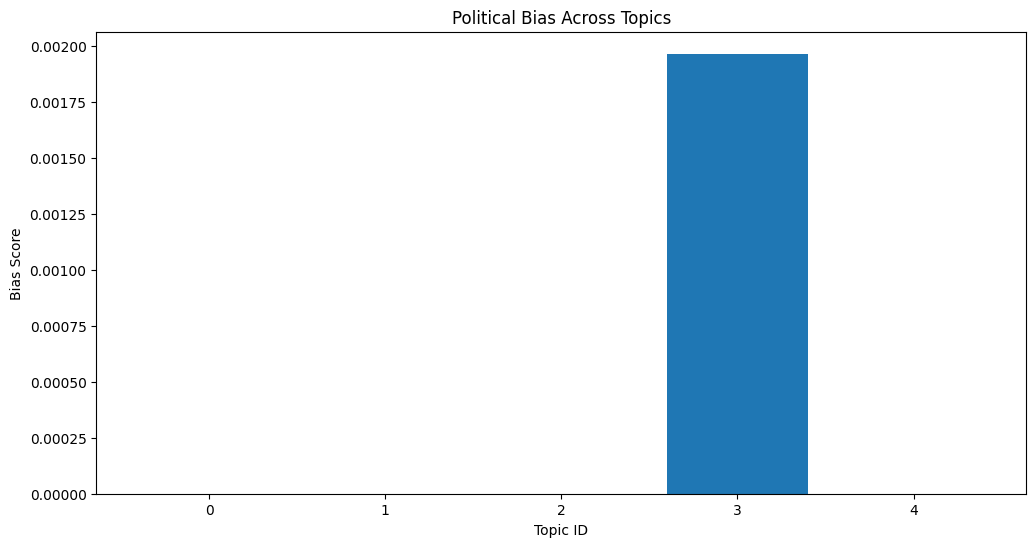

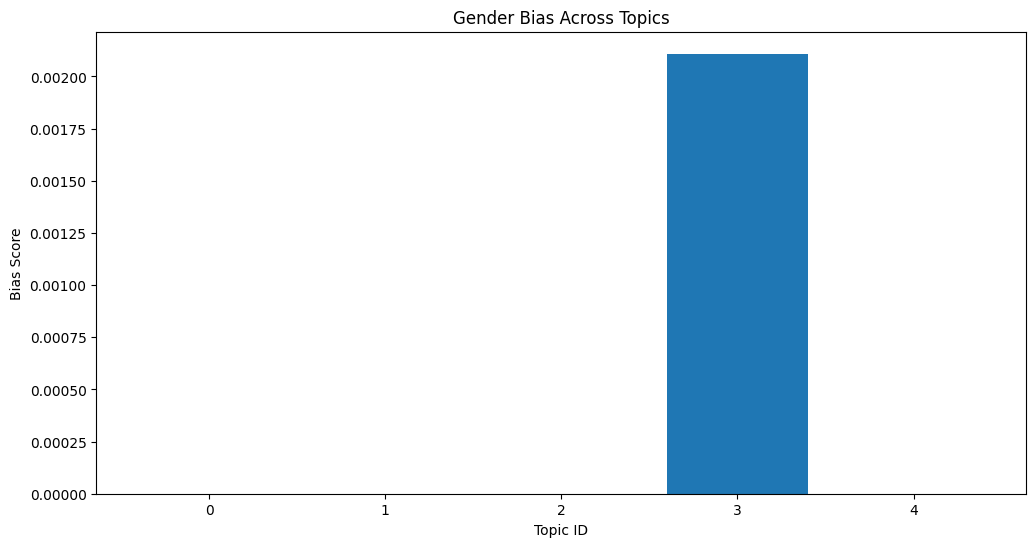

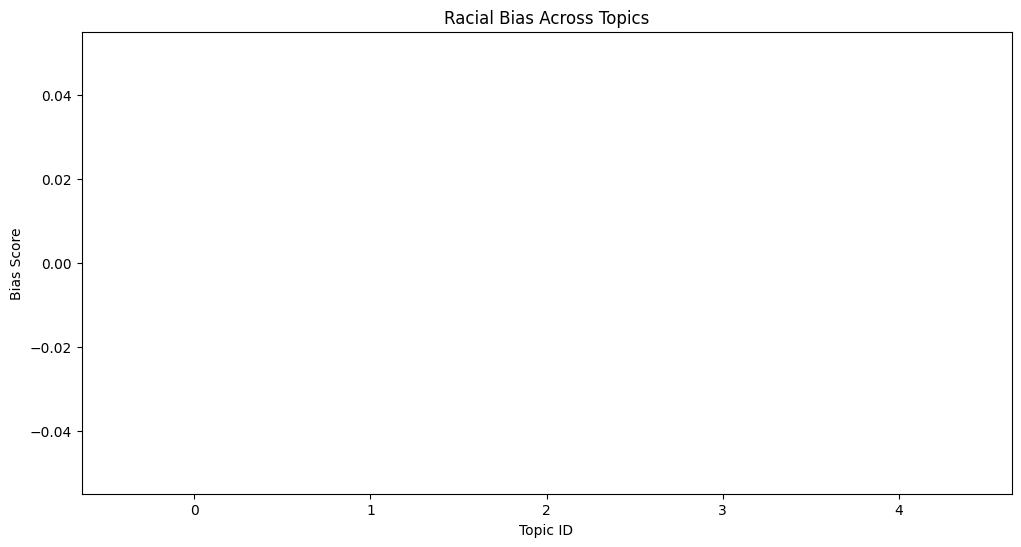


Topic with highest political bias (Topic 3):
Top terms: {'people': 0.0071264734, 'would': 0.006823722, 'trump': 0.006533537, 'one': 0.0063821655, 'like': 0.0048338138, 'right': 0.004648236, 'dont': 0.0045329733, 'think': 0.0037314848, 'u': 0.003725715, 'many': 0.00363252}

Topic with highest gender bias (Topic 3):
Top terms: {'people': 0.0071264734, 'would': 0.006823722, 'trump': 0.006533537, 'one': 0.0063821655, 'like': 0.0048338138, 'right': 0.004648236, 'dont': 0.0045329733, 'think': 0.0037314848, 'u': 0.003725715, 'many': 0.00363252}

Topic with highest racial bias (Topic 0):
Top terms: {'article': 0.014503605, 'n': 0.01406058, 'nn': 0.013260561, 'page': 0.010716821, 'please': 0.0062607797, 'wikipedia': 0.0061261915, 'talk': 0.0056651793, 'would': 0.004500946, 'see': 0.0042109014, 'link': 0.0039851293}


In [12]:

import pandas as pd
import numpy as np
from gensim import corpora
from gensim.models import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# # Load your preprocessed data
# # Assuming you have a CSV file with a column 'processed_text' containing preprocessed text
# # bias_train = pd.read_csv('preprocessed_bias_train.csv')

# # Create Dictionary
# dictionary = corpora.Dictionary(bias_train['processed_text'])

# # Create Corpus
# corpus = [dictionary.doc2bow(text) for text in bias_train['processed_text']]

# # Build LDA model
# num_topics = 10  # You can adjust this number
# lda_model = LdaMulticore(corpus=corpus,
#                          id2word=dictionary,
#                          num_topics=num_topics,
#                          random_state=100,
#                          chunksize=100,
#                          passes=10,
#                          per_word_topics=True)

# # Print the topics
# print("LDA Topics:")
# for idx, topic in lda_model.print_topics(-1):
#     print(f"Topic: {idx} \nWords: {topic}\n")

# # Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=bias_train['processed_text'], dictionary=dictionary, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print(f'\nCoherence Score: {coherence_lda}')

# Functions for topic analysis
def get_topic_terms(lda_model, topic_id, top_n=10):
    return dict(lda_model.show_topic(topic_id, top_n))

def analyze_topics(lda_model, corpus, num_topics):
    topic_prevalence = [0] * num_topics
    for doc in corpus:
        topic_dist = lda_model.get_document_topics(doc)
        for topic, prob in topic_dist:
            topic_prevalence[topic] += prob

    topic_prevalence = [count / len(corpus) for count in topic_prevalence]
    
    return topic_prevalence

def plot_topic_prevalence(topic_prevalence):
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(topic_prevalence)), topic_prevalence)
    plt.xlabel('Topic ID')
    plt.ylabel('Topic Prevalence')
    plt.title('Topic Prevalence in Corpus')
    plt.show()

def create_wordcloud(lda_model, topic_id):
    topic_words = get_topic_terms(lda_model, topic_id, top_n=30)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Topic {topic_id}')
    plt.show()

def analyze_bias(lda_model, num_topics):
    bias_indicators = {
        'political': ['democrat', 'republican', 'liberal', 'conservative'],
        'gender': ['man', 'woman', 'male', 'female'],
        'racial': ['black', 'white', 'asian', 'hispanic'],
    }

    bias_scores = {category: [0] * num_topics for category in bias_indicators}

    for topic_id in range(num_topics):
        topic_terms = get_topic_terms(lda_model, topic_id, top_n=50)
        for category, terms in bias_indicators.items():
            bias_scores[category][topic_id] = sum(topic_terms.get(term, 0) for term in terms)

    return bias_scores

# Main analysis
topic_prevalence = analyze_topics(lda_model, corpus, num_topics)
plot_topic_prevalence(topic_prevalence)

# Analyze top 5 most prevalent topics
top_topics = sorted(range(num_topics), key=lambda i: topic_prevalence[i], reverse=True)[:5]
for topic_id in top_topics:
    print(f"\nAnalyzing Topic {topic_id}")
    print("Top terms:", get_topic_terms(lda_model, topic_id))
    create_wordcloud(lda_model, topic_id)

# Analyze potential biases
bias_scores = analyze_bias(lda_model, num_topics)
for category, scores in bias_scores.items():
    plt.figure(figsize=(12, 6))
    plt.bar(range(num_topics), scores)
    plt.xlabel('Topic ID')
    plt.ylabel('Bias Score')
    plt.title(f'{category.capitalize()} Bias Across Topics')
    plt.show()

# Print topics with highest bias scores
for category, scores in bias_scores.items():
    max_bias_topic = max(range(num_topics), key=lambda i: scores[i])
    print(f"\nTopic with highest {category} bias (Topic {max_bias_topic}):")
    print("Top terms:", get_topic_terms(lda_model, max_bias_topic))
